**1. Random Forest Classifier (RF)**

Random Forest is an ensemble learning method that builds multiple decision trees and merges their results to improve accuracy and reduce overfitting. Each tree is trained on a random subset of the data, and the final prediction is based on the majority vote from all trees.

**Strengths:**

*   Good at handling complex data with many features.

*   Robust to overfitting compared to a single decision tree.

*   Handles both numerical and categorical data well.

**Weaknesses:**

*   Can be computationally expensive for very large datasets.

*   Can be harder to interpret since it’s a collection of many trees.

**2. Naive Bayes (NB)**

What it is: Naive Bayes is a probabilistic classifier based on Bayes' Theorem, assuming that features (skills, in this case) are independent given the class (job title). It calculates the probability of each job title given the input skills and chooses the job with the highest probability.

**Strengths:**

*   Simple and fast to train.
*   Works well with small datasets and is often used in text classification tasks.

*   Easy to interpret and explain.

**Weaknesses:**

*   Assumes feature independence, which is often unrealistic in real-world data (e.g., skills are often correlated).

*   May not perform well on datasets where this assumption doesn’t hold.

**3. K-Nearest Neighbors (KNN)**

KNN is a non-parametric method where the prediction is made based on the majority class of the nearest neighbors in the feature space. For a given set of skills, the model finds the closest job titles and assigns the most frequent one.

Strengths:

*   Simple to understand and implement.

*   No training phase required (lazy learning), as predictions are made based on the stored data.

Weaknesses:

*   Computationally expensive during prediction time, as it requires calculating distances between the query point and all training points.

*   Performance degrades with high-dimensional data (curse of dimensionality), making it less effective with a large number of features like in text data.

Comparison:
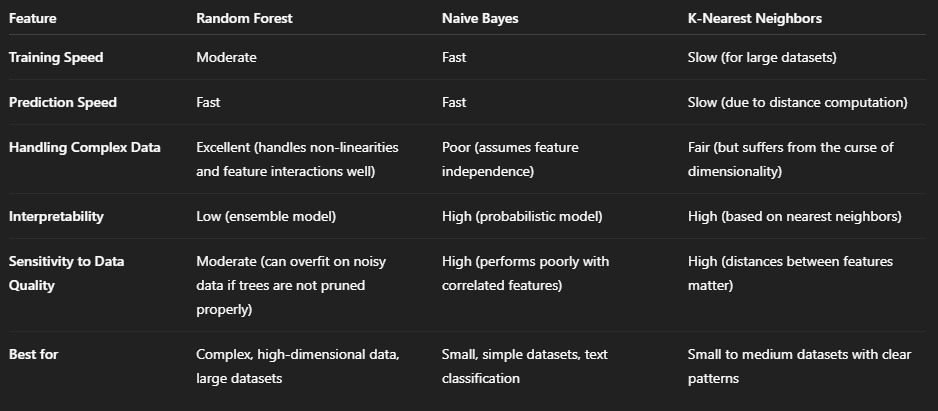

**Which model is more suitable and why?**

**Random Forest** is the most suitable model for this task because:

*  Accuracy and robustness: It handles complex relationships in data better than Naive Bayes and KNN, especially when features (skills) are highly interrelated. It can learn non-linear decision boundaries and generalize well to unseen data.

*  Better handling of high-dimensional data: Since you're using TF-IDF vectors for job requirements, which may have many features, Random Forest performs well on high-dimensional datasets without suffering from the curse of dimensionality like KNN.

*  Scalability: Unlike KNN, which can be slow during prediction, Random Forest is relatively fast when predicting multiple job titles, and its performance doesn't degrade significantly as more data is added.

**When might you choose Naive Bayes or KNN?**
*  Naive Bayes could be more suitable if your dataset is relatively small and you're aiming for faster predictions with simpler models. It's also good for text-based problems where the feature independence assumption roughly holds (though it's rarely perfect).

*  KNN might be a good choice if your dataset is small and you value model simplicity and interpretability. However, for larger datasets with many features like yours, KNN can become slow, making Random Forest a better choice.

**Final Recommendation:**
**Random Forest** is the most appropriate model. It will provide better generalization, handle complex relationships in my skill-job data, and scale well as I potentially expand my dataset. However, Naive Bayes and KNN can still be useful for smaller datasets or when I want faster, simpler models for quick prototyping.

In [1]:
!pip install flask pyngrok pandas scikit-learn

In [ ]:
from flask import Flask, request, render_template_string, session
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import sqlite3
import numpy as np
from pyngrok import ngrok
import pandas as pd
import random

app = Flask(__name__)
app.secret_key = 'your_secret_key_here_change_in_production'

data = pd.DataFrame({
    'Job_Title': [
        'Data Scientist', 'Software Engineer', 'Data Analyst', 'AI Engineer', 'Frontend Developer',
        'Backend Developer', 'Full Stack Developer', 'Machine Learning Engineer', 'Business Analyst', 'Web Developer',
        'DevOps Engineer', 'Cloud Architect', 'Cybersecurity Analyst', 'Mobile App Developer', 'Product Manager',
        'UI/UX Designer', 'Systems Analyst', 'Database Administrator', 'Network Engineer', 'QA Engineer',
        'Game Developer', 'Blockchain Developer', 'NLP Engineer', 'Computer Vision Engineer', 'Robotics Engineer',
        'IT Support Specialist', 'Embedded Systems Engineer', 'Data Engineer', 'Technical Writer', 'Site Reliability Engineer'
    ],
    'Job_Requirements': [
        'Python, Machine Learning, Data Science',
        'Java, Spring, Microservices, Agile',
        'SQL, Data Analysis, Python, Statistics',
        'Python, AI, Deep Learning, TensorFlow',
        'JavaScript, React, HTML, CSS',
        'Java, Spring Boot, SQL, REST API',
        'JavaScript, Node.js, MongoDB, Express',
        'Python, TensorFlow, Keras, Neural Networks',
        'Business Intelligence, SQL, Reporting, Power BI',
        'HTML, CSS, JavaScript, Node.js',
        'Linux, Docker, Kubernetes, CI/CD',
        'AWS, Azure, Cloud Design, DevOps',
        'Network Security, Python, Risk Assessment, Firewalls',
        'Flutter, Dart, Android, iOS, Firebase',
        'Agile, Communication, Roadmaps, JIRA',
        'Figma, Adobe XD, HTML, CSS, User Research',
        'Systems Design, Requirements Analysis, UML',
        'SQL, Database Design, Oracle, Backup',
        'Cisco, Routing, Switching, Network Security',
        'Selenium, Java, TestNG, Bug Tracking',
        'Unity, C#, Game Physics, Animation',
        'Solidity, Ethereum, Smart Contracts, Web3.js',
        'NLP, Python, spaCy, Transformers, NLTK',
        'OpenCV, Python, Computer Vision, CNNs',
        'C++, ROS, Sensors, Embedded Programming',
        'Technical Support, Troubleshooting, Windows, Help Desk',
        'C, C++, RTOS, ARM, Microcontrollers',
        'ETL, Big Data, Python, Apache Spark',
        'Documentation, Markdown, APIs, Technical Diagrams',
        'Monitoring, Alerting, Automation, Reliability'
    ]
})

salary_data = pd.DataFrame({
    'Job_Title': [
        'Data Scientist', 'Software Engineer', 'Data Analyst', 'AI Engineer', 'Frontend Developer',
        'Backend Developer', 'Full Stack Developer', 'Machine Learning Engineer', 'Business Analyst', 'Web Developer',
        'DevOps Engineer', 'Cloud Architect', 'Cybersecurity Analyst', 'Mobile App Developer', 'Product Manager',
        'UI/UX Designer', 'Systems Analyst', 'Database Administrator', 'Network Engineer', 'QA Engineer',
        'Game Developer', 'Blockchain Developer', 'NLP Engineer', 'Computer Vision Engineer', 'Robotics Engineer',
        'IT Support Specialist', 'Embedded Systems Engineer', 'Data Engineer', 'Technical Writer', 'Site Reliability Engineer'
    ],
    'Entry_Level_Salary': [2000, 1800, 1500, 2200, 1600, 1700, 1900, 2100, 1400, 1500, 1800, 2200, 1900, 1700, 2000, 1500, 1600, 1700, 1600, 1400, 1800, 2500, 2100, 2200, 2300, 1200, 2000, 2000, 1300, 2000],
    'Mid_Level_Salary': [3500, 3000, 2500, 4000, 2800, 3000, 3500, 4200, 2800, 2600, 3500, 4500, 3800, 3200, 4000, 2800, 3000, 3200, 3000, 2500, 3500, 5000, 4200, 4500, 4800, 2000, 3800, 3800, 2200, 3800],
    'Senior_Level_Salary': [6000, 5500, 4500, 7000, 5000, 5500, 6500, 7500, 5000, 4500, 6500, 8000, 7000, 6000, 7500, 5000, 5500, 6000, 5500, 4500, 6500, 9000, 7500, 8000, 8500, 3500, 7000, 7000, 4000, 7000]
})

experience_requirements = {
    'Entry_Level': {'min_years': 0, 'max_years': 2, 'education': ['Bachelor', 'Associate', 'Bootcamp']},
    'Mid_Level': {'min_years': 2, 'max_years': 5, 'education': ['Bachelor', 'Master']},
    'Senior_Level': {'min_years': 5, 'max_years': 100, 'education': ['Bachelor', 'Master', 'PhD']}
}

learning_time_data = {
    'Data Scientist': 20,
    'Software Engineer': 15,
    'Data Analyst': 12,
    'AI Engineer': 22,
    'Frontend Developer': 12,
    'Backend Developer': 15,
    'Full Stack Developer': 18,
    'Machine Learning Engineer': 20,
    'Business Analyst': 10,
    'Web Developer': 12,
    'DevOps Engineer': 16,
    'Cloud Architect': 18,
    'Cybersecurity Analyst': 16,
    'Mobile App Developer': 14,
    'Product Manager': 10,
    'UI/UX Designer': 12,
    'Systems Analyst': 14,
    'Database Administrator': 14,
    'Network Engineer': 15,
    'QA Engineer': 12,
    'Game Developer': 18,
    'Blockchain Developer': 20,
    'NLP Engineer': 20,
    'Computer Vision Engineer': 22,
    'Robotics Engineer': 22,
    'IT Support Specialist': 8,
    'Embedded Systems Engineer': 18,
    'Data Engineer': 16,
    'Technical Writer': 8,
    'Site Reliability Engineer': 16
}

interview_questions = {
    'Data Scientist': [
        'Explain the difference between supervised and unsupervised learning.',
        'What is overfitting and how do you prevent it?',
        'Describe a data science project you worked on.',
        'How do you handle missing data in a dataset?',
        'What is the difference between precision and recall?'
    ],
    'Software Engineer': [
        'Explain the principles of object-oriented programming.',
        'What is the difference between an interface and an abstract class?',
        'Describe your experience with version control systems.',
        'How do you approach debugging complex issues?',
        'What design patterns have you used in your projects?'
    ],
    'Data Analyst': [
        'How do you approach data cleaning and preparation?',
        'What is your experience with SQL and database querying?',
        'Explain the difference between mean, median, and mode.',
        'How do you create effective data visualizations?',
        'Describe a time when your analysis influenced a business decision.'
    ],
    'AI Engineer': [
        'What is the difference between AI, machine learning, and deep learning?',
        'Explain how neural networks work.',
        'What frameworks have you used for AI development?',
        'How do you handle bias in AI models?',
        'Describe your experience with natural language processing or computer vision.'
    ],
    'Frontend Developer': [
        'What is the virtual DOM in React?',
        'Explain the box model in CSS.',
        'How do you optimize website performance?',
        'What is the difference between var, let, and const?',
        'Describe your experience with responsive design.'
    ],
    'Backend Developer': [
        'Explain RESTful API design principles.',
        'How do you handle database optimization?',
        'What is your approach to API security?',
        'Describe your experience with microservices architecture.',
        'How do you handle error handling and logging?'
    ],
    'Full Stack Developer': [
        'How do you decide between frontend and backend solutions?',
        'Describe your experience with both SQL and NoSQL databases.',
        'What is your approach to building scalable applications?',
        'How do you manage state in modern web applications?',
        'Explain your deployment and CI/CD process.'
    ],
    'Machine Learning Engineer': [
        'What is the bias-variance tradeoff?',
        'Explain gradient descent and its variants.',
        'How do you evaluate machine learning models?',
        'Describe your experience with feature engineering.',
        'What is regularization and why is it important?'
    ],
    'Business Analyst': [
        'How do you gather and document business requirements?',
        'What business intelligence tools have you used?',
        'Explain your approach to stakeholder management.',
        'How do you prioritize features or requirements?',
        'Describe a time when you identified a key business insight from data.'
    ],
    'Web Developer': [
        'What is the difference between HTML, CSS, and JavaScript?',
        'How do you ensure cross-browser compatibility?',
        'Explain your approach to web accessibility.',
        'What is your experience with version control?',
        'How do you optimize website loading speed?'
    ],
    'DevOps Engineer': [
        'Explain the concept of Infrastructure as Code.',
        'What is your experience with containerization and orchestration?',
        'How do you implement CI/CD pipelines?',
        'Describe your approach to monitoring and alerting.',
        'What is your experience with cloud platforms?'
    ],
    'Cloud Architect': [
        'How do you design for high availability and disaster recovery?',
        'What are the key considerations for cloud migration?',
        'Explain the difference between IaaS, PaaS, and SaaS.',
        'How do you optimize cloud costs?',
        'Describe your experience with multi-cloud or hybrid cloud architectures.'
    ],
    'Cybersecurity Analyst': [
        'What is the CIA triad in information security?',
        'How do you conduct a security risk assessment?',
        'Explain common types of cyber attacks and how to prevent them.',
        'What is your experience with security tools and SIEM systems?',
        'How do you stay updated on the latest security threats?'
    ],
    'Mobile App Developer': [
        'What is the difference between native and cross-platform development?',
        'How do you handle different screen sizes and orientations?',
        'Explain your approach to mobile app performance optimization.',
        'What is your experience with mobile backend services?',
        'How do you handle app store submission and updates?'
    ],
    'Product Manager': [
        'How do you prioritize features in a product roadmap?',
        'Describe your approach to user research and feedback.',
        'What frameworks do you use for product strategy?',
        'How do you measure product success?',
        'Describe a time when you had to pivot a product strategy.'
    ],
    'UI/UX Designer': [
        'What is your design process from research to prototype?',
        'How do you conduct user testing and incorporate feedback?',
        'Explain the difference between UI and UX.',
        'What design tools and software do you use?',
        'How do you balance user needs with business goals?'
    ],
    'Systems Analyst': [
        'How do you gather and analyze system requirements?',
        'What methodologies do you use for systems analysis?',
        'Explain your experience with process modeling and documentation.',
        'How do you bridge communication between technical and non-technical stakeholders?',
        'Describe a complex system you analyzed and improved.'
    ],
    'Database Administrator': [
        'How do you ensure database performance and optimization?',
        'Explain your approach to database backup and recovery.',
        'What is database normalization and why is it important?',
        'How do you handle database security?',
        'Describe your experience with database migration and upgrades.'
    ],
    'Network Engineer': [
        'Explain the OSI model and its layers.',
        'How do you troubleshoot network connectivity issues?',
        'What is your experience with routing protocols?',
        'How do you ensure network security?',
        'Describe your experience with network monitoring tools.'
    ],
    'QA Engineer': [
        'What is the difference between manual and automated testing?',
        'How do you create effective test cases?',
        'Explain your experience with test automation frameworks.',
        'What is regression testing and when do you use it?',
        'How do you prioritize bugs and defects?'
    ],
    'Game Developer': [
        'What game engines have you worked with?',
        'How do you optimize game performance?',
        'Explain your approach to game physics and collision detection.',
        'What is your experience with multiplayer game development?',
        'How do you balance gameplay mechanics and user experience?'
    ],
    'Blockchain Developer': [
        'Explain how blockchain technology works.',
        'What is a smart contract and how do you develop one?',
        'How do you ensure security in blockchain applications?',
        'What is your experience with different blockchain platforms?',
        'Describe the consensus mechanisms you are familiar with.'
    ],
    'NLP Engineer': [
        'What NLP techniques and models have you worked with?',
        'Explain tokenization and its importance in NLP.',
        'How do you handle different languages in NLP projects?',
        'What is your experience with transformer models?',
        'How do you evaluate NLP model performance?'
    ],
    'Computer Vision Engineer': [
        'What computer vision algorithms have you implemented?',
        'Explain convolutional neural networks and their applications.',
        'How do you handle image preprocessing?',
        'What is your experience with object detection and recognition?',
        'How do you optimize computer vision models for production?'
    ],
    'Robotics Engineer': [
        'What is your experience with robot operating systems?',
        'How do you approach sensor integration and calibration?',
        'Explain path planning and navigation algorithms.',
        'What is your experience with embedded systems in robotics?',
        'How do you test and validate robotic systems?'
    ],
    'IT Support Specialist': [
        'How do you prioritize and manage multiple support tickets?',
        'Describe your troubleshooting methodology.',
        'What is your experience with help desk software?',
        'How do you handle difficult or frustrated users?',
        'What technical documentation have you created?'
    ],
    'Embedded Systems Engineer': [
        'What microcontrollers and processors have you worked with?',
        'Explain your experience with real-time operating systems.',
        'How do you debug embedded systems?',
        'What is your approach to power optimization in embedded devices?',
        'Describe your experience with hardware-software integration.'
    ],
    'Data Engineer': [
        'How do you design and implement data pipelines?',
        'What is your experience with big data technologies?',
        'Explain ETL vs ELT processes.',
        'How do you ensure data quality and consistency?',
        'What data warehousing solutions have you worked with?'
    ],
    'Technical Writer': [
        'How do you approach documenting complex technical concepts?',
        'What tools do you use for technical documentation?',
        'How do you collaborate with developers and product teams?',
        'Describe your process for keeping documentation up to date.',
        'What is your experience with API documentation?'
    ],
    'Site Reliability Engineer': [
        'What is the difference between DevOps and SRE?',
        'How do you measure and improve system reliability?',
        'Explain your approach to incident management and post-mortems.',
        'What monitoring and observability tools do you use?',
        'How do you implement service level objectives (SLOs)?'
    ],
    'Default': [
        'Tell me about yourself and your experience.',
        'Why are you interested in this role?',
        'What are your greatest strengths?',
        'Describe a challenging project you worked on.',
        'Where do you see yourself in 5 years?'
    ]
}

job_roadmaps = {
    "Data Scientist": "https://roadmap.sh/ai-data-scientist",
    "Software Engineer": "https://roadmap.sh/software-architect",
    "Data Analyst": "https://roadmap.sh/data-analyst",
    "AI Engineer": "https://roadmap.sh/ai-engineer",
    "Frontend Developer": "https://roadmap.sh/frontend",
    "Backend Developer": "https://roadmap.sh/backend",
    "Full Stack Developer": "https://roadmap.sh/full-stack",
    "Machine Learning Engineer": "https://aigents.co/learn/roadmaps/machine-learning-roadmap",
    "Business Analyst": "https://oyasalofa.medium.com/the-ultimate-business-analysis-roadmap-191bfe15093a",
    "Web Developer": "https://www.scaler.com/blog/web-development-roadmap/",
    "DevOps Engineer": "https://roadmap.sh/devops",
    "Cloud Architect": "https://www.cloudskillsboost.google/paths/12",
    "Cybersecurity Analyst": "https://roadmap.sh/cyber-security",
    "Mobile App Developer": "https://roadmap.sh/roadmaps?g=Mobile+Development",
    "Product Manager": "https://roadmap.sh/product-manager",
    "UI/UX Designer": "https://roadmap.sh/ux-design",
    "Systems Analyst": "https://roadmap.sh/system-engineer",
    "Database Administrator": "https://roadmap.sh/roadmaps?g=Databases",
    "Network Engineer": "https://github.com/eovchar/neteng-roadmap/blob/master/img/NetengRoadmap_v2.png",
    "QA Engineer": "https://roadmap.sh/qa",
    "Game Developer": "https://roadmap.sh/roadmaps?g=Game+Development",
    "Blockchain Developer": "https://roadmap.sh/blockchain",
    "NLP Engineer": "https://github.com/pemagrg1/Natural-Language-Processing-NLP-Roadmap",
    "Computer Vision Engineer": "https://pclub.in/roadmap/2024/08/17/cv-roadmap/",
    "Robotics Engineer": "https://github.com/Sarrasor/RoboticsRoadmap",
    "IT Support Specialist": "https://www.mindhubpro.com/it-specialist-roadmap?srsltid=AfmBOop1PlaWl6Vv7A7XKcVrN2Ff1S68GYsQIMiEr5V6uXoGiTtF4L0q",
    "Embedded Systems Engineer": "https://github.com/m3y54m/Embedded-Engineering-Roadmap?tab=readme-ov-file",
    "Data Engineer": "https://roadmap.sh/data-engineer",
    "Technical Writer": "https://roadmap.sh/technical-writer",
    "Site Reliability Engineer": "https://taubsolutions.com/comprehensive-sre-roadmap-for-beginner/"
}

job_titles = data['Job_Title'].tolist()
job_descriptions = data['Job_Requirements'].tolist()

template = '''
<!DOCTYPE html>
<html>
<head>
  <title>{{ title }}</title>
  <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.3.0/dist/css/bootstrap.min.css" rel="stylesheet">
  <style>
    body {
        background: linear-gradient(135deg, #f0f4ff, #c3dafe, #d6bcfa);
        font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        min-height: 100vh;
        display: flex;
        justify-content: center;
        align-items: center;
        color: #333;
        padding: 20px;
    }

    .container {
        background: rgba(255, 255, 255, 0.6);
        backdrop-filter: blur(15px);
        padding: 40px;
        border-radius: 25px;
        max-width: 700px;
        width: 100%;
        box-shadow: 0 10px 40px rgba(0, 0, 0, 0.2);
        text-align: center;
        transition: transform 0.3s ease, box-shadow 0.3s ease;
    }

    .container:hover {
        transform: translateY(-5px);
        box-shadow: 0 15px 50px rgba(0, 0, 0, 0.25);
    }

    h2 {
        font-weight: bold;
        font-size: 2.2rem;
        margin-bottom: 30px;
        background: linear-gradient(90deg, #7fafff, #c1b3ff);
        -webkit-background-clip: text;
        -webkit-text-fill-color: transparent;
        text-shadow: 1px 1px 6px rgba(0,0,0,0.1);
    }

    h3 {
        font-weight: 600;
        font-size: 1.5rem;
        margin-top: 30px;
        margin-bottom: 20px;
        color: #555;
    }

    input[type="text"], input[type="number"], select {
        padding: 10px 15px;
        border-radius: 50px;
        border: none;
        width: 70%;
        max-width: 400px;
        margin-bottom: 15px;
        outline: none;
        transition: all 0.3s ease;
        background: rgba(255,255,255,0.8);
        color: #333;
    }

    input:focus, select:focus {
        box-shadow: 0 0 15px rgba(127,175,255,0.6);
    }

    input[type="submit"], .btn-custom {
        padding: 10px 30px;
        border-radius: 50px;
        border: none;
        background: linear-gradient(45deg, #7fafff, #c1b3ff);
        color: #fff;
        font-weight: bold;
        cursor: pointer;
        transition: all 0.3s ease;
        margin: 10px 5px;
    }

    input[type="submit"]:hover, .btn-custom:hover {
        background: linear-gradient(45deg, #c1b3ff, #7fafff);
        transform: scale(1.05);
    }

    a { text-decoration: none; color: #4a4a4a; }
    a:hover { color: #7fafff; }

    .job-button {
        display: inline-block;
        margin: 8px 5px;
        padding: 12px 20px;
        border-radius: 50px;
        background: linear-gradient(45deg, #7fafff, #c1b3ff);
        color: #fff !important;
        font-weight: 600;
        min-width: 200px;
        text-align: center;
        transition: all 0.3s ease;
    }

    .job-button:hover {
        background: linear-gradient(45deg, #c1b3ff, #7fafff);
        transform: scale(1.05);
        box-shadow: 0 5px 15px rgba(0,0,0,0.2);
    }

    .job-button span {
        font-weight: bold;
        color: #ffd700;
        margin-left: 10px;
    }

    .result-card {
        background: rgba(255, 255, 255, 0.8);
        padding: 20px;
        border-radius: 15px;
        margin: 15px 0;
        text-align: left;
    }

    .result-card h4 {
        color: #7fafff;
        margin-bottom: 10px;
    }

    .result-card p {
        margin: 5px 0;
        color: #555;
    }

    .interview-question {
        background: rgba(193, 179, 255, 0.2);
        padding: 15px;
        border-radius: 10px;
        margin: 10px 0;
        text-align: left;
    }

    .form-group {
        margin-bottom: 15px;
    }

    label {
        display: block;
        margin-bottom: 5px;
        color: #555;
        font-weight: 600;
    }
</style>
</head>
<body>
  <div class="container">
    <h2>{{ heading }}</h2>

    {% if not show_results %}
    <form method="post">
        <div class="form-group">
            <label>Age:</label>
            <input type="number" name="age" placeholder="Enter your age" required min="16" max="100">
        </div>

        <div class="form-group">
            <label>Years of Experience:</label>
            <input type="number" name="experience" placeholder="Years of experience" required min="0" max="50">
        </div>

        <div class="form-group">
            <label>Skills (comma-separated):</label>
            <input type="text" name="skills" placeholder="e.g., Python, Java, SQL" required>
        </div>

        <div class="form-group">
            <label>Education Level:</label>
            <select name="education" required>
                <option value="">Select Education</option>
                <option value="High School">High School</option>
                <option value="Associate">Associate Degree</option>
                <option value="Bootcamp">Bootcamp</option>
                <option value="Bachelor">Bachelor's Degree</option>
                <option value="Master">Master's Degree</option>
                <option value="PhD">PhD</option>
            </select>
        </div>

        <div class="form-group">
            <label>Location:</label>
            <input type="text" name="location" placeholder="City, Country" required>
        </div>

        <div class="form-group">
            <label>Hours per week available for learning:</label>
            <input type="number" name="learning_time" placeholder="Hours per week" required min="1" max="168">
        </div>

        <input type="submit" value="Get Career Advice">
    </form>
    {% endif %}

    <div class="results">
      {% if best_job %}
        <div class="result-card">
            <h4>📋 Your Profile Summary:</h4>
            <p><strong>Age:</strong> {{ user_age }} years</p>
            <p><strong>Experience:</strong> {{ user_experience }} years</p>
            <p><strong>Skills:</strong> {{ user_skills }}</p>
            <p><strong>Education:</strong> {{ user_education }}</p>
            <p><strong>Location:</strong> {{ user_location }}</p>
            <p><strong>Available Learning Time:</strong> {{ user_learning_time }} hours/week</p>
        </div>

        <div class="result-card">
            <h4>🎯 Recommended Job: {{ best_job }}</h4>
            <p><strong>Match Confidence:</strong> {{ best_confidence }}%</p>
        </div>

        <div class="result-card">
            <h4>💰 Expected Salary Range (AZN):</h4>
            <p><strong>Your Level:</strong> {{ experience_level }}</p>
            <p><strong>Expected Salary:</strong> {{ expected_salary }} AZN/month</p>
            <p><em>Entry: {{ entry_salary }} | Mid: {{ mid_salary }} | Senior: {{ senior_salary }} AZN</em></p>
        </div>

        <div class="result-card">
            <h4>📚 Learning Roadmap:</h4>
            <p><strong>Recommended Hours/Week:</strong> {{ recommended_hours }} hours</p>
            <p><strong>Your Available Time:</strong> {{ user_learning_time }} hours/week</p>
            {% if can_learn %}
                <p style="color: green;">✓ You have sufficient time to learn this role!</p>
            {% else %}
                <p style="color: orange;">⚠ This role typically requires {{ recommended_hours }} hours/week. Consider adjusting your schedule.</p>
            {% endif %}
            <a class="job-button" href="{{ roadmap_link }}" target="_blank">View Full Roadmap</a>
        </div>

        <div class="result-card">
            <h4>🏢 Job Opportunities:</h4>
            <p>Based on your profile, here are similar roles you might be interested in:</p>
            {% for alt_job, alt_conf in alternative_jobs %}
                <span class="job-button" style="min-width: auto; padding: 8px 15px; font-size: 0.9rem;">
                    {{ alt_job }} ({{ alt_conf }}%)
                </span>
            {% endfor %}
        </div>

        <div class="result-card">
            <h4>🎤 Interview Simulation:</h4>
            <p>Practice these common interview questions for {{ best_job }}:</p>
            {% for question in interview_questions %}
                <div class="interview-question">
                    <strong>Q{{ loop.index }}:</strong> {{ question }}
                </div>
            {% endfor %}
        </div>

        <h3>All Model Results:</h3>

        {% if rf_results %}
        <h3>Random Forest Results:</h3>
        {% for job, conf, link in rf_results %}
          <a class="job-button" href="{{ link }}" target="_blank">{{ job }} <span>{{ conf }}%</span></a>
        {% endfor %}
        {% elif no_rf %}
        <p>{{ no_rf }}</p>
        {% endif %}

        {% if nb_results %}
        <h3>Naive Bayes Results:</h3>
        {% for job, conf, link in nb_results %}
          <a class="job-button" href="{{ link }}" target="_blank">{{ job }} <span>{{ conf }}%</span></a>
        {% endfor %}
        {% elif no_nb %}
        <p>{{ no_nb }}</p>
        {% endif %}

        {% if knn_results %}
        <h3>KNN Results:</h3>
        {% for job, conf, link in knn_results %}
          <a class="job-button" href="{{ link }}" target="_blank">{{ job }} <span>{{ conf }}%</span></a>
        {% endfor %}
        {% elif no_knn %}
        <p>{{ no_knn }}</p>
        {% endif %}

        <br><br>
        <a href="/" class="btn-custom">Start New Search</a>
      {% elif no_rf %}
        <p>{{ no_rf }}</p>
      {% endif %}
    </div>
  </div>
</body>
</html>
'''

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Job_Requirements'])
y = data['Job_Title']

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

nb_model = MultinomialNB()
nb_model.fit(X, y)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X, y)

def determine_experience_level(years):
    if years <= 2:
        return 'Entry_Level'
    elif years <= 5:
        return 'Mid_Level'
    else:
        return 'Senior_Level'

def get_expected_salary(job_title, experience_level):
    job_salary = salary_data[salary_data['Job_Title'] == job_title]
    if not job_salary.empty:
        return {
            'entry': int(job_salary['Entry_Level_Salary'].values[0]),
            'mid': int(job_salary['Mid_Level_Salary'].values[0]),
            'senior': int(job_salary['Senior_Level_Salary'].values[0]),
            'expected': int(job_salary[f'{experience_level}_Salary'].values[0])
        }
    return None

def get_interview_questions(job_title):
    return interview_questions.get(job_title, interview_questions['Default'])

def recommend_job_rf(skills):
    input_vec = vectorizer.transform([skills])
    probs = rf_model.predict_proba(input_vec)[0]
    top_indices = probs.argsort()[-5:][::-1]
    return [(rf_model.classes_[i], round(probs[i]*100,2), job_roadmaps.get(rf_model.classes_[i], '#'))
            for i in top_indices if probs[i] > 0.01]

def recommend_job_nb(skills):
    input_vec = vectorizer.transform([skills])
    probs = nb_model.predict_proba(input_vec)[0]
    top_indices = probs.argsort()[-5:][::-1]
    return [(nb_model.classes_[i], round(probs[i]*100,2), job_roadmaps.get(nb_model.classes_[i], '#'))
            for i in top_indices if probs[i] > 0.01]

def recommend_job_knn(skills):
    input_vec = vectorizer.transform([skills])
    probs = knn_model.predict_proba(input_vec)[0]
    top_indices = probs.argsort()[-5:][::-1]
    return [(knn_model.classes_[i], round(probs[i]*100,2), job_roadmaps.get(knn_model.classes_[i], '#'))
            for i in top_indices if probs[i] > 0.01]

@app.route('/', methods=['GET', 'POST'])
def index():
    rf_results = nb_results = knn_results = None
    no_rf = no_nb = no_knn = None
    show_results = False

    # Additional variables for new features
    best_job = None
    best_confidence = None
    expected_salary = None
    experience_level = None
    roadmap_link = None
    interview_questions_list = None
    alternative_jobs = None
    recommended_hours = None
    user_learning_time = None
    can_learn = None
    entry_salary = mid_salary = senior_salary = None
    user_age = user_experience = user_skills = user_education = user_location = None

    if request.method == 'POST':
        age = int(request.form.get('age', 25))
        experience = int(request.form.get('experience', 0))
        skills_input = request.form['skills'].lower().split(',')
        skills_input = [s.strip() for s in skills_input if s.strip()]
        education = request.form.get('education', 'Bachelor')
        location = request.form.get('location', 'Azerbaijan')
        learning_time = int(request.form.get('learning_time', 10))

        user_age = age
        user_experience = experience
        user_skills = ', '.join(skills_input)
        user_education = education
        user_location = location
        user_learning_time = learning_time
        experience_level = determine_experience_level(experience)

        matched_jobs = []
        for req, title in zip(data['Job_Requirements'], data['Job_Title']):
            req_lower = req.lower()
            if any(skill in req_lower for skill in skills_input):
                matched_jobs.append(title)

        if not matched_jobs:
            no_rf = no_nb = no_knn = "No jobs matched for the entered skills. Try adding more relevant skills."
        else:
            rf_jobs = recommend_job_rf(' '.join(skills_input))
            nb_jobs = recommend_job_nb(' '.join(skills_input))
            knn_jobs = recommend_job_knn(' '.join(skills_input))

            rf_results = rf_jobs if rf_jobs else None
            nb_results = nb_jobs if nb_jobs else None
            knn_results = knn_jobs if knn_jobs else None

            if rf_jobs:
                show_results = True
                best_job = rf_jobs[0][0]
                best_confidence = rf_jobs[0][1]

                salary_info = get_expected_salary(best_job, experience_level)
                if salary_info:
                    expected_salary = salary_info['expected']
                    entry_salary = salary_info['entry']
                    mid_salary = salary_info['mid']
                    senior_salary = salary_info['senior']

                roadmap_link = job_roadmaps.get(best_job, '#')

                interview_questions_list = get_interview_questions(best_job)

                alternative_jobs = [(job, conf) for job, conf, _ in rf_jobs[1:4]]

                recommended_hours = learning_time_data.get(best_job, 10)
                can_learn = learning_time >= recommended_hours

            if not rf_jobs: no_rf = "No jobs matched for Random Forest."
            if not nb_jobs: no_nb = "No jobs matched for Naive Bayes."
            if not knn_jobs: no_knn = "No jobs matched for KNN."

    return render_template_string(template,
                                  title="AI Career Advisor",
                                  heading="AI Smart Career Adviser",
                                  show_results=show_results,
                                  best_job=best_job,
                                  best_confidence=best_confidence,
                                  expected_salary=expected_salary,
                                  entry_salary=entry_salary,
                                  mid_salary=mid_salary,
                                  senior_salary=senior_salary,
                                  experience_level=experience_level.replace('_', ' ') if experience_level else None,
                                  roadmap_link=roadmap_link,
                                  interview_questions=interview_questions_list,
                                  alternative_jobs=alternative_jobs,
                                  recommended_hours=recommended_hours,
                                  user_learning_time=user_learning_time,
                                  can_learn=can_learn,
                                  rf_results=rf_results,
                                  nb_results=nb_results,
                                  knn_results=knn_results,
                                  no_rf=no_rf,
                                  no_nb=no_nb,
                                  no_knn=no_knn,
                                  user_age=user_age,
                                  user_experience=user_experience,
                                  user_skills=user_skills,
                                  user_education=user_education,
                                  user_location=user_location)

if __name__ == '__main__':
    ngrok.set_auth_token("2vUSIcL6fm2KunDzjVYb3MqtnEh_75oy3Xtoq5vukWV1LsjHB")
    public_url = ngrok.connect(5000)
    print(f" * ngrok tunnel: {public_url}")
    app.run(port=5000, debug=True, use_reloader=False)

 * ngrok tunnel: NgrokTunnel: "https://c5598579743f.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [24/Nov/2025 04:41:51] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Nov/2025 04:41:52] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [24/Nov/2025 04:42:06] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Nov/2025 04:42:29] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Nov/2025 04:46:24] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Nov/2025 04:47:18] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Nov/2025 04:49:49] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Nov/2025 04:50:24] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Nov/2025 04:51:05] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Nov/2025 04:51:32] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Nov/2025